<a href="https://colab.research.google.com/github/ravishankarramakrishnan/Deep_Learning_Practice/blob/master/Autoencoders_for_Image_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AutoEncoders
Autoencoders are a type of ANN's which helps in performing a task of Data Encoding(Representational Learning) 

## Data: Fashion MNIST

### Labels:
- 0 - TShirt
- 1 - Trouser
- 2 - Pullover
- 3 - Dress
- 4 - Coat
- 5 - Sandal
- 6 - Shirt
- 7 - Sneaker
- 8 - Bag
- 9 - Ankle Boot

In [1]:
# Importing the Libraries and Dataset

import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading the Dataset -> Fashion MNIST

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("The Shape of the Training Data is {} & Shape of Test Data is {}".format((X_train.shape, y_train.shape), (X_test.shape, y_test.shape)))

4423680/4422102 [==============================] - 0s 0us/step
The Shape of the Training Data is ((60000, 28, 28), (60000,)) & Shape of Test Data is ((10000, 28, 28), (10000,))


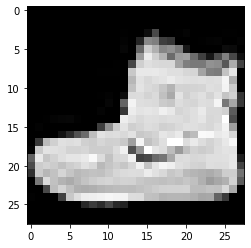

In [3]:
# Visualising a Sample Image

plt.imshow(X_train[0], cmap= 'gray') # As we have Grayscale Images

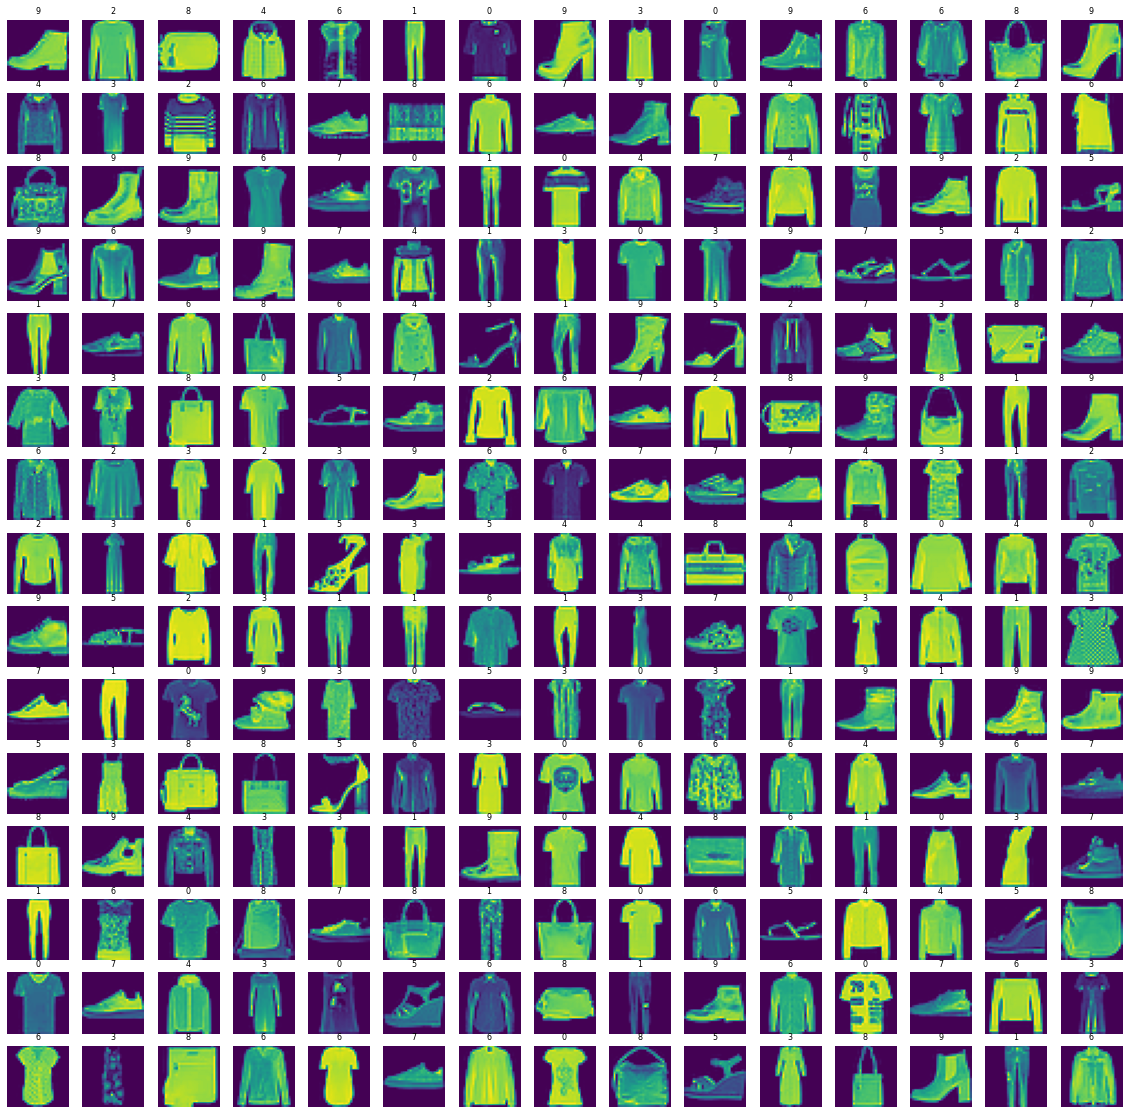

In [4]:
# Data Visualisation - Visualizing a grid of Images

W_grid = 15
L_grid = 15

fig, ax = plt.subplots(nrows= L_grid, ncols= W_grid, figsize= (20,20))
axes = ax.ravel() # Flatten the 15*15 matrix into 225 array

# Get Length of Training Dataset
n_train = len(X_train)

# Loop and Plot
for img in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train) # Select a Random Number
    axes[img].imshow(X_train[index])
    axes[img].set_title(y_train[index], fontsize= 8)
    axes[img].axis('off'); # Removes X axis and y axis

In [5]:
# Data Preprocessing - Adding Noise to Training Data

# Normalising the Data (Get the Pixels to range between 0 and 1)
X_train = X_train / 255.
X_test = X_test / 255.

# Add Some Noise to the Data
noise_factor = 0.3

# Create a Noisy Dataset
noise_dataset = []
for img in X_train:
    noisy_image = img + noise_factor * np.random.randn(*img.shape) # * represents all; and img.shape is Tuple, so we Unpack it | In this Value might be > 1. So we clip it
    noisy_image = np.clip(a= noisy_image, a_min= 0, a_max= 1)
    noise_dataset.append(noisy_image)

In [10]:
# Adding Noise to Testing Data

# Create a Noisy Dataset
noise_test_dataset = []
for img in X_test:
    noisy_image = img + noise_factor * np.random.randn(*img.shape) # * represents all; and img.shape is Tuple, so we Unpack it | In this Value might be > 1. So we clip it
    noisy_image = np.clip(a= noisy_image, a_min= 0, a_max= 1)
    noise_test_dataset.append(noisy_image)

In [15]:
# Convert the Dataset to Array for the Model Training
noise_dataset = np.asarray(noise_dataset)
noise_test_dataset = np.asarray(noise_test_dataset)

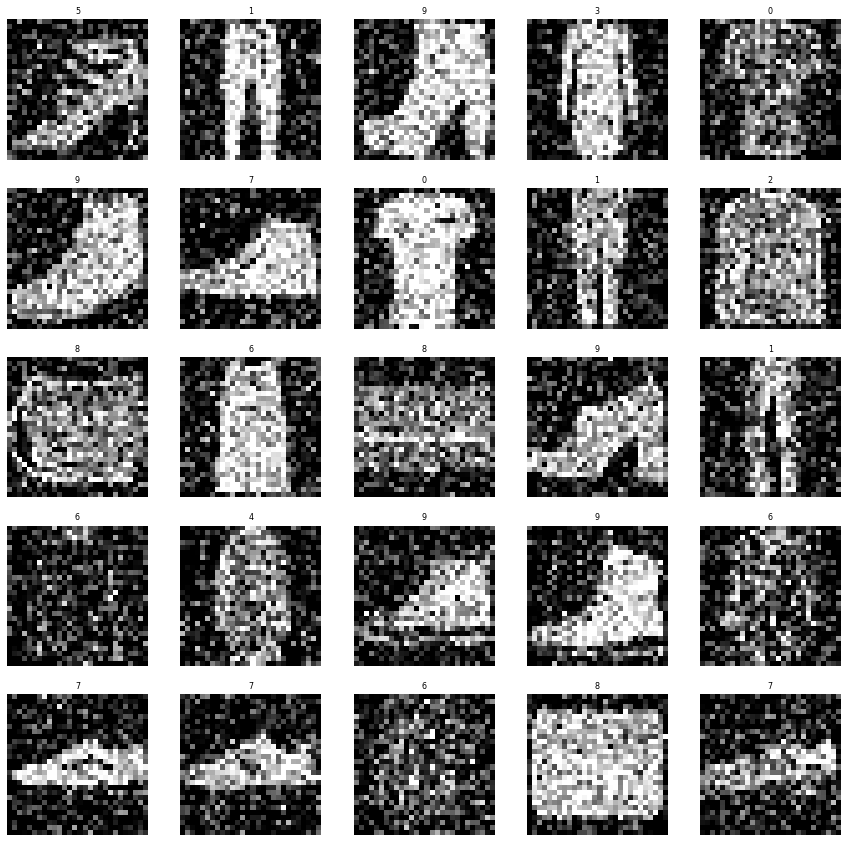

In [6]:
# Data Visualisation - Visualizing the Noisy Dataset

W_grid = 5
L_grid = 5

fig, ax = plt.subplots(nrows= L_grid, ncols= W_grid, figsize= (15,15))
axes = ax.ravel() 

# Get Length of Training Dataset
n_train = len(noise_dataset)

# Loop and Plot
for img in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train) # Select a Random Number
    axes[img].imshow(noise_dataset[index], cmap= 'gray')
    axes[img].set_title(y_train[index], fontsize= 8)
    axes[img].axis('off'); # Removes X axis and y axis

In [9]:
# Auto Encoders :- Encoder -> Bottleneck -> Decoder. Works very well if input has a good correlation (Best for Image Compression), Performs poor if inputs are Independent

# Math behind Encoder
# h(x) = sigmoid(W * x + b)

# Math behind Decoder
# x^ = sigmoid(W.T * h(x) + b). || In this we have Tied Weights (Weights from Encoder -> Bottleneck == Bottleneck -> Decoder)

# Objective of AutoEncoders is to minimize Reconstruction Error (X^ - X). It is similar to PCA if Linear Activation Function is used!

In [12]:
X_train.shape[1:]

(28, 28)

In [14]:
# Building and Training Deep Autoencoder Model

model = tf.keras.models.Sequential()

# Encoder
model.add(tf.keras.layers.Conv2D(filters= 16, kernel_size= 3, strides= (2,2), padding= 'same', input_shape= (28, 28, 1) )) # Change Stride to 2 if error occurs
model.add(tf.keras.layers.Conv2D(filters= 8, kernel_size= 3, strides= (2,2), padding= 'same'))

# Encoded Image Layer / Bottleneck
model.add(tf.keras.layers.Conv2D(filters= 8, kernel_size= 3, strides= (1,1), padding= 'same'))

# Decoder - Upscale the Image using Conv2DTranspose (From 7*7*8 to 14*14*16)
model.add(tf.keras.layers.Conv2DTranspose(filters= 16, kernel_size= 3, strides= (2,2), padding= 'same'))
model.add(tf.keras.layers.Conv2DTranspose(filters= 1, kernel_size= 3, strides= (2,2), activation= 'sigmoid',padding= 'same')) # The Shape of Output must match that of Input

# Compile the Model

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001), loss= 'binary_crossentropy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Fitting and Training the Model. In Autoencoders, Input and Outputs are the Same

model.fit(noise_dataset.reshape(-1, 28, 28, 1),
          X_train.reshape(-1, 28, 28, 1),
          epochs= 100,
          batch_size= 256,
          validation_data= (noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3006 - val_loss: 0.3027
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3003 - val_loss: 0.3024
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3001 - val_loss: 0.3022
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2998 - val_loss: 0.3020
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2996 - val_loss: 0.3019
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2994 - val_loss: 0.3017
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2993 - val_loss: 0.3017
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2992 - val_loss: 0.3015
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2991 - val_loss: 0.3014
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2990 - val_lo

In [18]:
# Evaluating the Trained Model 

evaluation = model.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))
print(f"Test Accuracy is: {evaluation :.3f} ")

313/313 [==============================] - 1s 2ms/step - loss: 0.3000
Test Accuracy is: 0.300 


In [19]:
# Apply Predict Method on AutoEncoder Model to generate the Output

# Predict for a sample of 10 images
predicted_sample = model.predict(noise_test_dataset[:10].reshape(-1, 28, 28, 1))

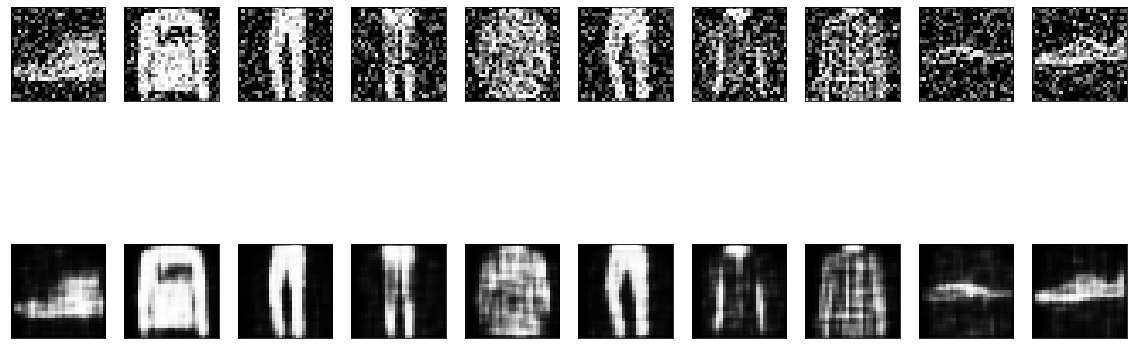

In [21]:
# Plot the Predicted Data with Noisy Data

fig, axes = plt.subplots(nrows= 2, ncols= 10, sharex= True, sharey= True, figsize= (20, 8))
for images, row in zip([noise_test_dataset[:10], predicted_sample], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap= "Greys_r")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)